In [120]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
#from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import classification_report
import tabulate

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense, Embedding, Bidirectional, Dropout,GRU


In [74]:
s1= pd.read_csv('/content/Sentiment1.csv')
s2= pd.read_csv('/content/Sentiment Dataset 2.csv')
s3= pd.read_csv('/content/Sentiment Dataset 3.csv')

In [75]:
frames = [s1, s2, s3]

df = pd.concat(frames)

In [76]:
df.head()

,Column1,Column2
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [77]:
df.rename(columns={'Column1': 'text', 'Column2': 'label'}, inplace=True)

In [78]:
df.head()

,text,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


# Q1. Perform required text preprocessing

In [79]:
nltk.download('stopwords')
stopwords = stopwords.words('english')
stopwords.append('br')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [80]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [81]:
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [82]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [83]:
# function to preprocess the review text
def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text)                                           # retaining only alphanumerics and spaces (removing punctuation)
    text = re.sub(r'http\S+', '', text)                                           # removing URLs
    text = text.lower()                                                           # casefolding (lowercase)
    text = [w for w in text.split(' ') if w not in stopwords]                     # removing stopwords
    #text = [str(TextBlob(i).correct()) for i in text]                            # correcting spellings
    text = " ".join(text)
    return text

In [84]:
# preprocessing all the data
df['text'] = df.text.apply(lambda x: preprocess(x))
df.head(15)

,text,label
0,way plug us unless go converter,0
1,good case excellent value,1
2,great jawbone,1
3,tied charger conversations lasting 45 minutesm...,0
4,mic great,1
5,jiggle plug get line right get decent volume,0
6,several dozen several hundred contacts imagine...,0
7,razr owneryou must,1
8,needless say wasted money,0
9,waste money time,0


In [85]:
# lemmatization
df['text'] = df.text.apply(lambda x: WordNetLemmatizer().lemmatize(x))

# Q2.Find out how many total words or features exist in the corpus
#Q3.Visualize the most frequent words and bigrams, trigrams.

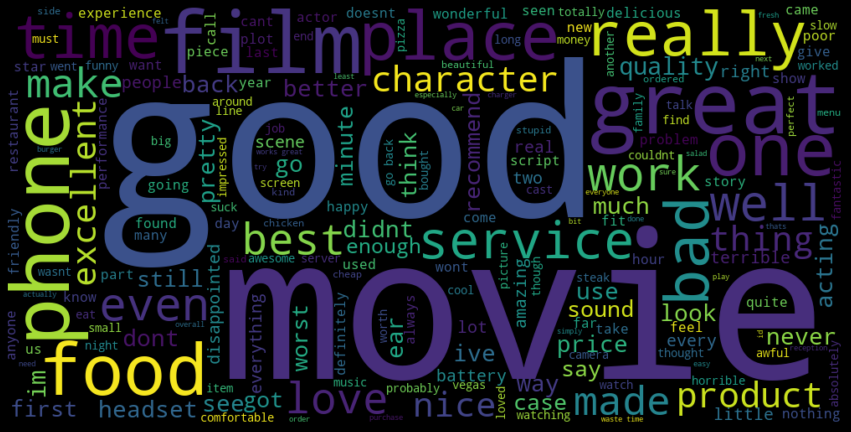

In [87]:
# visualising the most frequent words

text = " ".join(i for i in df.text)
stop_words = ["br"] + list(STOPWORDS)
wordcloud = WordCloud(stopwords=stop_words, width=1000, height=500).generate(text)
plt.figure(figsize=(15,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [88]:
# bigram frequencies
words = df['text'].tolist()

tokenized = [word_tokenize(i) for i in words]
flat_list = [num for sublist in tokenized for num in sublist]

bigram_df = pd.DataFrame(pd.Series(nltk.ngrams(flat_list, 2)).value_counts()).rename_axis('bigram').reset_index('bigram')
bigram_df.columns = ['bigram', 'count']
bigram_df['bigram'] = bigram_df['bigram'].astype("string")
bigram_df.head(10)

,bigram,count
0,"('0', 'the')",33
1,"('go', 'back')",19
2,"('waste', 'time')",17
3,"('works', 'great')",17
4,"('1', 'i')",17
5,"('would', 'recommend')",14
6,"('customer', 'service')",14
7,"('ive', 'ever')",14
8,"('sound', 'quality')",13
9,"('one', 'best')",13


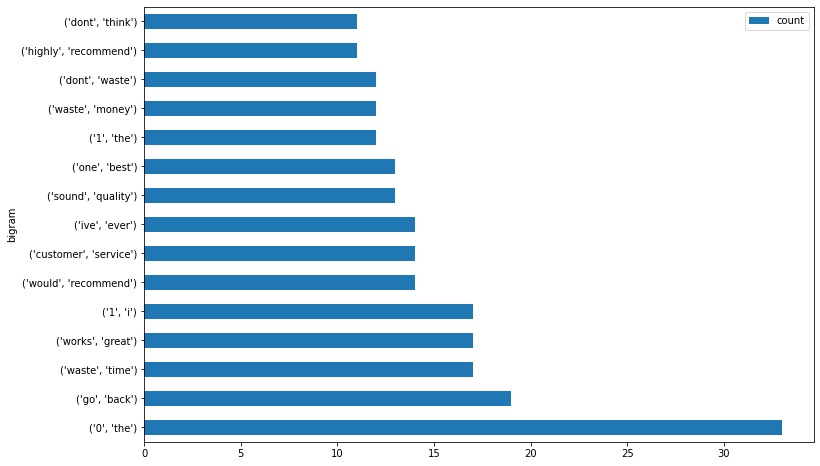

In [89]:
bigram_df.head(15).plot(kind='barh', x='bigram', y='count', figsize=(12,8));

In [92]:
# trigram frequencies
# words = df['text'].tolist()

# tokenized = [word_tokenize(i) for i in words]
# flat_list = [num for sublist in tokenized for num in sublist]

tri_gram_df = pd.DataFrame(pd.Series(nltk.ngrams(flat_list, 3)).value_counts()).rename_axis('trigram').reset_index('trigram')
tri_gram_df.columns = ['trigram', 'count']
tri_gram_df['trigram'] = bigram_df['trigram'].astype("string")
tri_gram_df.head(10)

KeyError: ignored

In [94]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=25)

In [97]:
train.head()

,text,label
901,terrible phone holder,0
924,however much garlic fondue barely edible,0
689,people like european films art movies like mov...,1
220,movie bad,0
309,time film ended disliked despised,0


In [98]:
test.head()

,text,label
890,boyfriend tried mediterranean chicken salad fe...,1
598,great phone,1
63,wed definitely go back,1
615,charger worked week completely stopped chargin...,0
298,never dining place,0


In [99]:
# splitting into x and y sets
train_x = train['text']
test_x = test['text']

train_y = train['label']
test_y = test['label']

In [107]:
print(train['text'])
print(train['label'])

901                                terrible phone holder
924             however much garlic fondue barely edible
689    people like european films art movies like mov...
220                                          movie bad  
309                  time film ended disliked despised  
                             ...                        
255                                 poor quality service
443                                      nothing special
774                  flair bartenders absolutely amazing
318                                      want money back
156    writers smack think best actors actresses bonu...
Name: text, Length: 2198, dtype: object
901    0
924    0
689    1
220    0
309    0
      ..
255    0
443    0
774    1
318    0
156    1
Name: label, Length: 2198, dtype: int64


In [108]:
print(test['text'])
print(test['label'])

890    boyfriend tried mediterranean chicken salad fe...
598                                          great phone
63                                wed definitely go back
615    charger worked week completely stopped chargin...
298                                   never dining place
                             ...                        
37                            poor talk time performance
489                                              awesome
100            integrated seamlessly motorola razr phone
867                           nice case feels good hands
129    definitely worth venturing strip pork belly re...
Name: text, Length: 550, dtype: object
890    1
598    1
63     1
615    0
298    0
      ..
37     0
489    1
100    1
867    1
129    1
Name: label, Length: 550, dtype: int64


In [100]:
# tokenization
tokenizer = Tokenizer()

# preparing vocabulary
tokenizer.fit_on_texts(train_x)

# converting text into integer sequences
train_x = tokenizer.texts_to_sequences(train_x)
test_x = tokenizer.texts_to_sequences(test_x)

# padding to prepare sequences of same length
train_x=pad_sequences(train_x,maxlen=120)
test_x=pad_sequences(test_x,maxlen=120)

In [102]:
# checking size of vocabulary
size_of_vocabulary = len(tokenizer.word_index)+1
print(size_of_vocabulary)

4801


## Q4.Build 3 models, a 3layer LSTM, 4layer RNNand a 4 layer GRU based model for predicting the sentiment

# MODEL 1: 3 layer LSTM

In [103]:
# building LSTM model
model1 = Sequential()

# embedding layer
model1.add(Embedding(size_of_vocabulary, 128, input_length=120))

# 2 LSTM layers
model1.add(LSTM(2, return_sequences=True, dropout=0.2))

# final LSTM layer
model1.add(LSTM(1, return_sequences=False, dropout=0.2))

model1.add(Dropout(0.05))

# output layer
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 128)          614528    
                                                                 
 lstm (LSTM)                 (None, 120, 2)            1048      
                                                                 
 lstm_1 (LSTM)               (None, 1)                 16        
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 615,594
Trainable params: 615,594
Non-trainable params: 0
_________________________________________________________________


In [112]:
# fitting the model
history1 = model1.fit(train_x, train_y, batch_size=128, epochs=300, verbose=1)

Epoch 1/300
18/18 [==============================] - 0s 21ms/step - loss: 0.1802 - accuracy: 0.9586
Epoch 2/300
18/18 [==============================] - 0s 15ms/step - loss: 0.1748 - accuracy: 0.9641
Epoch 3/300
18/18 [==============================] - 0s 12ms/step - loss: 0.1750 - accuracy: 0.9504
Epoch 4/300
18/18 [==============================] - 0s 13ms/step - loss: 0.1742 - accuracy: 0.9577
Epoch 5/300
18/18 [==============================] - 0s 14ms/step - loss: 0.1698 - accuracy: 0.9577
Epoch 6/300
18/18 [==============================] - 0s 13ms/step - loss: 0.1701 - accuracy: 0.9559
Epoch 7/300
18/18 [==============================] - 0s 13ms/step - loss: 0.1721 - accuracy: 0.9595
Epoch 8/300
18/18 [==============================] - 0s 14ms/step - loss: 0.1709 - accuracy: 0.9577
Epoch 9/300
18/18 [==============================] - 0s 13ms/step - loss: 0.1708 - accuracy: 0.9527
Epoch 10/300
18/18 [==============================] - 0s 13ms/step - loss: 0.1680 - accuracy: 0.9536

In [113]:
# evaluating on test data
loss1, acc1 = model1.evaluate(test_x, test_y)

18/18 [==============================] - 1s 7ms/step - loss: 1.0353 - accuracy: 0.7182


# MODEL 2- 4 LAYER RNN

In [115]:
# building RNN model
model2 = Sequential()

# embedding layer
model2.add(Embedding(size_of_vocabulary, 128, input_length=120))

# 1- simple RNN layer
model2.add(SimpleRNN(units = 150, activation = "relu", return_sequences = True, input_shape = (train_x.shape[1], 1)))
# Second RNN layer 
model2.add(SimpleRNN(units = 100, activation = "relu", return_sequences = True))
# Third RNN layer 
model2.add(SimpleRNN(units = 50, activation = "relu", return_sequences = True))
# Fourth RNN layer 
model2.add(SimpleRNN(units = 50))




# softmax output layer for probability distribution
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 128)          614528    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 120, 150)          41850     
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 120, 100)          25100     
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 120, 50)           7550      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 50)                5050      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 694,129
Trainable params: 694,129
Non-tr

In [119]:
# fitting the model
history2 = model2.fit(train_x, train_y, batch_size=128, epochs=100, verbose=1)

Epoch 1/100
18/18 [==============================] - 10s 514ms/step - loss: 0.0155 - accuracy: 0.9945
Epoch 2/100
18/18 [==============================] - 8s 445ms/step - loss: 0.0159 - accuracy: 0.9945
Epoch 3/100
18/18 [==============================] - 11s 601ms/step - loss: 0.0144 - accuracy: 0.9959
Epoch 4/100
18/18 [==============================] - 12s 672ms/step - loss: 0.0132 - accuracy: 0.9941
Epoch 5/100
18/18 [==============================] - 9s 477ms/step - loss: 0.0125 - accuracy: 0.9955
Epoch 6/100
18/18 [==============================] - 10s 553ms/step - loss: 0.0112 - accuracy: 0.9950
Epoch 7/100
18/18 [==============================] - 9s 471ms/step - loss: 0.0101 - accuracy: 0.9955
Epoch 8/100
18/18 [==============================] - 8s 467ms/step - loss: 0.0102 - accuracy: 0.9955
Epoch 9/100
18/18 [==============================] - 8s 465ms/step - loss: 0.0093 - accuracy: 0.9959
Epoch 10/100
18/18 [==============================] - 8s 454ms/step - loss: 0.0114 - ac

In [118]:
# evaluating on test data
loss2, acc2 = model2.evaluate(test_x, test_y)

18/18 [==============================] - 1s 37ms/step - loss: 1.2658 - accuracy: 0.6364


# 4 layer GRU Based Model

In [121]:
from tensorflow.keras.layers import GRU

In [123]:
# building RNN model
model3 = Sequential()

# embedding layer
model3.add(Embedding(size_of_vocabulary, 128, input_length=120))

# 1- GRU  layer
model3.add(GRU(150,return_sequences=True, input_shape=(train_x.shape[1],1), activation='relu'))
# Second GRU layer 
model3.add(GRU(100,return_sequences=True, activation='relu'))

# Third GRU layer 
model3.add(GRU(50,return_sequences=True, activation='relu'))

# Fourth GRU layer 
model3.add(GRU(50))


# softmax output layer for probability distribution
model3.add(Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 120, 128)          614528    
                                                                 
 gru_3 (GRU)                 (None, 120, 150)          126000    
                                                                 
 gru_4 (GRU)                 (None, 120, 100)          75600     
                                                                 
 gru_5 (GRU)                 (None, 120, 50)           22800     
                                                                 
 gru_6 (GRU)                 (None, 50)                15300     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 854,279
Trainable params: 854,279
Non-tr

In [124]:
# fitting the model
history3 = model3.fit(train_x, train_y, batch_size=128, epochs=100, verbose=1)

Epoch 1/100
18/18 [==============================] - 25s 1s/step - loss: 0.6931 - accuracy: 0.5068
Epoch 2/100
18/18 [==============================] - 14s 805ms/step - loss: 0.6692 - accuracy: 0.7011
Epoch 3/100
18/18 [==============================] - 14s 793ms/step - loss: 0.3948 - accuracy: 0.8312
Epoch 4/100
18/18 [==============================] - 14s 797ms/step - loss: 0.2044 - accuracy: 0.9199
Epoch 5/100
18/18 [==============================] - 17s 932ms/step - loss: 0.1054 - accuracy: 0.9613
Epoch 6/100
18/18 [==============================] - 20s 1s/step - loss: 0.0750 - accuracy: 0.9773
Epoch 7/100
18/18 [==============================] - 15s 862ms/step - loss: 0.0662 - accuracy: 0.9800
Epoch 8/100
18/18 [==============================] - 21s 1s/step - loss: 0.0664 - accuracy: 0.9759
Epoch 9/100
18/18 [==============================] - 24s 1s/step - loss: 0.0445 - accuracy: 0.9845
Epoch 10/100
18/18 [==============================] - 19s 993ms/step - loss: 0.0363 - accuracy

In [125]:
# evaluating on test data
loss3, acc3 = model3.evaluate(test_x, test_y)

18/18 [==============================] - 2s 65ms/step - loss: 1.4716 - accuracy: 0.7564


# Q5. Compute ,compare and comment on the accuracy of the threemodels based on precision and recall.

The better performing model has lower loss, higher f1 -score and overall higher accuracy.

In [126]:
# precision, recall, f1-score of LSTM
pred_1 = model1.predict(test_x)
pred_1[pred_1>0.5] = 1
pred_1[pred_1<=0.5] = 0
print(classification_report(test_y, pred_1))

18/18 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       260
           1       0.74      0.72      0.73       290

    accuracy                           0.72       550
   macro avg       0.72      0.72      0.72       550
weighted avg       0.72      0.72      0.72       550



In [127]:
# precision, recall, f1-score of RNN
pred_2 = model2.predict(test_x)
pred_2[pred_2>0.5] = 1
pred_2[pred_2<=0.5] = 0
print(classification_report(test_y, pred_2))

18/18 [==============================] - 1s 36ms/step
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       260
           1       0.67      0.64      0.66       290

    accuracy                           0.64       550
   macro avg       0.64      0.64      0.64       550
weighted avg       0.64      0.64      0.64       550



In [128]:
# precision, recall, f1-score of GRU
pred_3 = model3.predict(test_x)
pred_3[pred_3>0.5] = 1
pred_3[pred_3<=0.5] = 0
print(classification_report(test_y, pred_3))

18/18 [==============================] - 2s 63ms/step
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       260
           1       0.77      0.77      0.77       290

    accuracy                           0.76       550
   macro avg       0.76      0.76      0.76       550
weighted avg       0.76      0.76      0.76       550



In [130]:
# comparing both the models
table = [['Model', 'Loss', 'Accuracy'],
         ['LSTM', loss1, acc1],
         ['RNN', loss2, acc2],
         ['GRU', loss3, acc3],]

print(tabulate.tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════╤═════════╤════════════╕
│ Model   │    Loss │   Accuracy │
╞═════════╪═════════╪════════════╡
│ LSTM    │ 1.03527 │   0.718182 │
├─────────┼─────────┼────────────┤
│ RNN     │ 1.26579 │   0.636364 │
├─────────┼─────────┼────────────┤
│ GRU     │ 1.47155 │   0.756364 │
╘═════════╧═════════╧════════════╛


ALL THE MODELS PERFOEM SIMILARLY WITH PRECISION, RECALL, F1 SCORE AND ACCURACY BEING AROUND THE SAME RANGE.
AS ILLUSTRATED ABOVE - HIGHER F1, LOWER LOSS AND HIGHER ACCURACY IS A BETTER MODEL.
THE GRU MODEL HAS MARGINALLY BETTER ACCURACY AND THE LSTM MODEL HAS MARGINALLY BETTER LOSS 
RNN PERFORMS THE WORST

# Q6.Visualize the learning curves and comment on the number of epochs required to learn .

KeyError: ignored

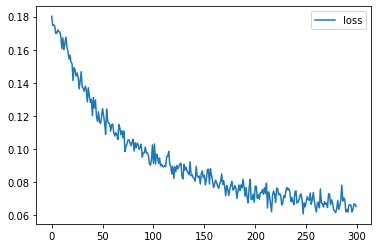

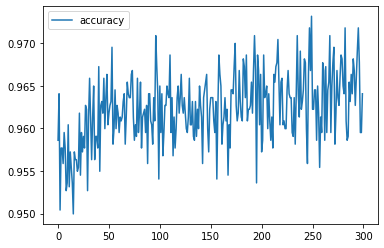

In [132]:
#LSTM
history_df1 = pd.DataFrame(history1.history)
history_df1.loc[0:, ['loss']].plot()
history_df1.loc[0:, ['accuracy']].plot()
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df1['val_loss'].min(), 
              history_df1['val_accuracy'].max()))

KeyError: ignored

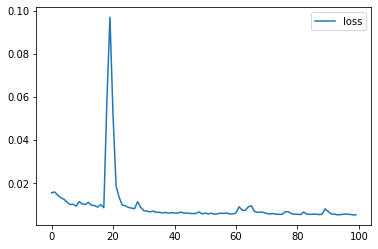

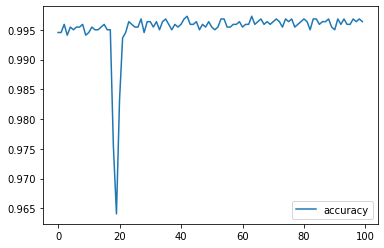

In [133]:
#RNN
history_df2 = pd.DataFrame(history2.history)

history_df2.loc[0:, ['loss' ]].plot()
history_df2.loc[0:, ['accuracy']].plot()
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df2['val_loss'].min(), 
              history_df2['val_accuracy'].max()))

KeyError: ignored

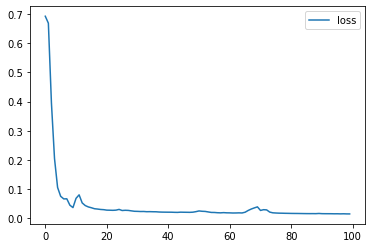

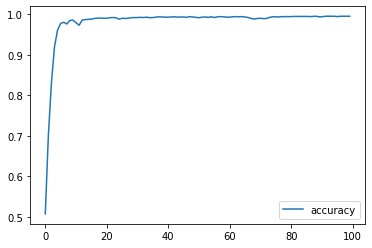

In [134]:
history_df3 = pd.DataFrame(history3.history)

history_df3.loc[0:, ['loss']].plot()
history_df3.loc[0:, ['accuracy']].plot()
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df3['val_loss'].min(), 
              history_df3['val_accuracy'].max()))